In [336]:
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

from tqdm import tqdm
from datetime import datetime

from IPython.display import Image
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

from sklearn.neighbors import KNeighborsClassifier


In [337]:
df = pd.read_csv('albums_all.csv')
#df["artists"].value_counts()
#df.info()
df.shape

(2833, 45)

In [338]:
# Omgjør dato til kun årstall
def date(row):
    row = int(row[0:4])
    return row

df["release_date"] = df["release_date"].apply(date)

In [339]:
# Ved å sortere på release date fant vi at det finnes et album med release date = 0, 
# som skaper problemer for predikering og visualisering. Derfor fjernes dette albumet.

#df["release_date"] = np.sort(df["release_date"])
#df.head()
df = df[df.release_date != 0]

# Det samme gjelder total_tracks, der det er et album med 930 sanger. Dette fjernes fra datasettet.

#df["total_tracks"] = np.sort(df["total_tracks"])
#df.tail()
df = df[df.total_tracks != 930]

# Det er også noen med gjennomsnittlig sanglengde på over 3000000 ms = 50 min. Disse fjernes.

#df["average_dur"] = (df["t_dur0"] + df["t_dur1"] + df["t_dur2"])/3
#df["average_dur"] = np.sort(df["average_dur"])
#df.tail()
df = df[((df["t_dur0"] + df["t_dur1"] + df["t_dur2"])/3) < 3000000]

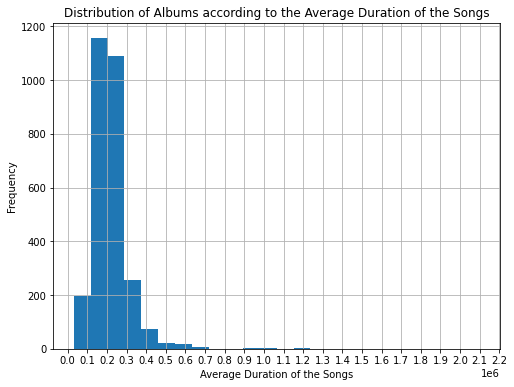

In [340]:
# Visualiserer snittlengde på sanger per album.
# Koden for plotet basert på det fra Kaggle
plt.figure(figsize=(8, 6))
plt.hist((df["t_dur0"] + df["t_dur1"] + df["t_dur2"])/3, bins = 24)
plt.locator_params(axis = "x", nbins = 24)
plt.locator_params(axis = "y", nbins = 12)
plt.title("Distribution of Albums according to the Average Duration of the Songs")
plt.xlabel("Average Duration of the Songs")
plt.ylabel("Frequency")
plt.grid()
plt.show()

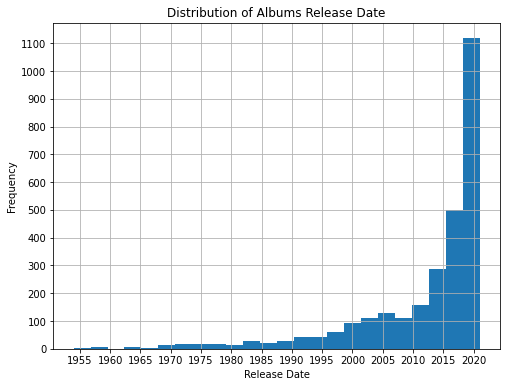

In [341]:
plt.figure(figsize=(8, 6))
plt.hist(df["release_date"], bins = 24)
plt.locator_params(axis = "x", nbins = 24)
plt.locator_params(axis = "y", nbins = 12)
plt.title("Distribution of Albums Release Date")
plt.xlabel("Release Date")
plt.ylabel("Frequency")
plt.grid()
plt.show()

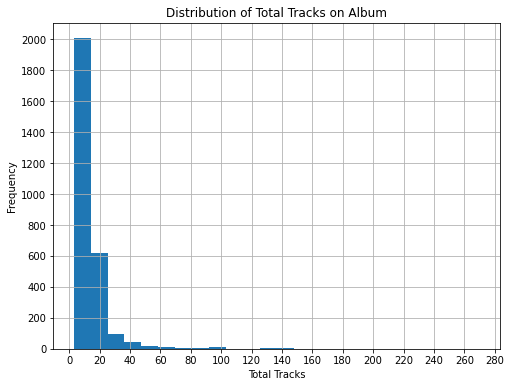

In [342]:
plt.figure(figsize=(8, 6))
plt.hist(df["total_tracks"], bins = 24)
plt.locator_params(axis = "x", nbins = 24)
plt.locator_params(axis = "y", nbins = 12)
plt.title("Distribution of Total Tracks on Album")
plt.xlabel("Total Tracks")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [343]:
# Fjerner alle med gjennomsnittlig sanglengde over 1 000 000ms = 16.67 min (litt usikker på hvor cutoffen burde være)
df = df.loc[(df["t_dur0"] + df["t_dur1"] + df["t_dur2"])/3 < 1000000]

In [344]:
# Fjerner alle album utgitt før 1965
df = df.loc[df["release_date"] > 1965]

df.shape

(2805, 45)

In [345]:
# Fjerner alle med mer enn 60 tracks
df = df.loc[df["total_tracks"] < 60]
df.shape

(2770, 45)

In [346]:
target = df['popularity']
data = df.drop(['popularity', 'name', 'artists', 't_name0', 't_name1', 't_name2', 'id'], axis = 1)

In [347]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [348]:
# Lineær regresjon
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2-score:', r2,'\nMSE:', mse)

R2-score: 0.14666954387004427 
MSE: 340.96102112692574
